In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import os


In [2]:
directory = [file for file in os.listdir('../results/Tests2/') if '.xlsx' in file]
directory.sort()

In [34]:
def rarf_plot(df, ax):
    jac_list = []
    avg_list = []
    std_list = []
    for i in df['jaccard'].unique():
        jac_list.append(i)
        temp_df = df[df['jaccard'] == i]
        avg_list.append(temp_df['e_list'].mean())
        std_list.append(temp_df['e_list'].std())

    ax.plot(jac_list, avg_list, color='midnightblue', linestyle='-', linewidth=2, label='RaRF')
    ax.fill_between(jac_list,np.subtract(avg_list,std_list),np.add(avg_list,std_list), color='midnightblue', alpha=0.2)
    ax.fill_betweenx([0,3], 0, df['average_nan'][0], color='lightgrey', alpha=0.2)
    return avg_list, std_list


In [35]:
def kred_plot(df, ax):
    jac_list = []
    avg_list = []
    std_list = []
    for i in df['Proportion'].unique():
        jac_list.append(i)
        temp_df = df[df['Proportion'] == i]
        avg_list.append(temp_df['kMae'].mean())
        std_list.append(temp_df['kMae'].std())

    ax.plot(jac_list, avg_list, color='firebrick', linestyle='-', linewidth=2, label='kReduction')
    ax.fill_between(jac_list,np.subtract(avg_list,std_list),np.add(avg_list,std_list), color='firebrick', alpha=0.2)
    return max(avg_list)


In [36]:
def rf_plot(df, ax):
    avg = np.average(df['RF'])
    std = np.std(df['RF'])
    ax.plot((0,1), (avg,avg), color='grey', linestyle='--', linewidth=2, zorder=0)
    return avg,std


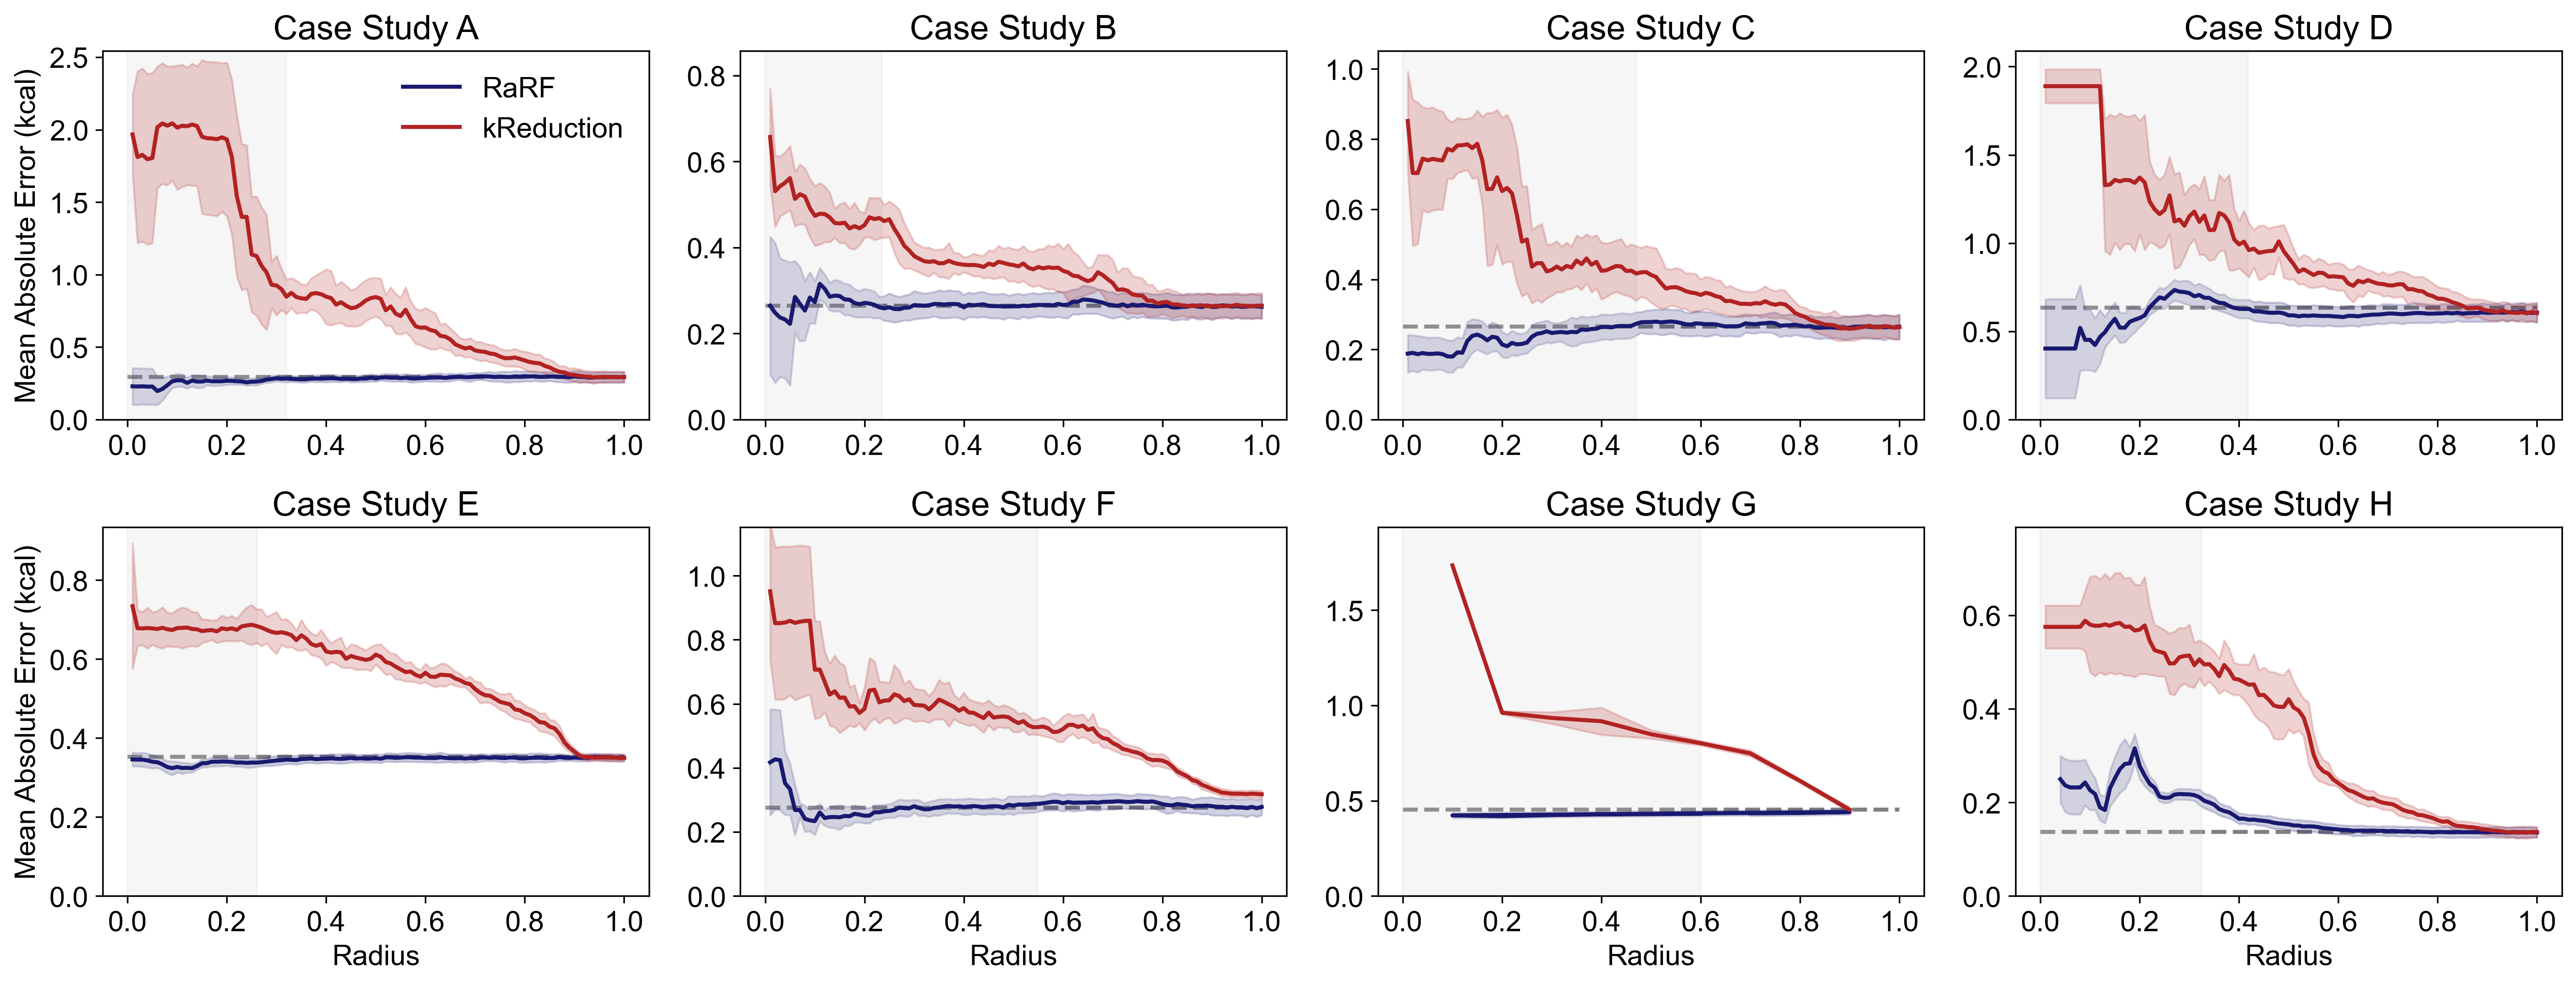

In [38]:
fig, ax = plt.subplots(2,4, figsize=(18,7), dpi=300)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
letter_list = ['A','B','C','D','E','F','G','H']

for numberfile, file in enumerate(directory):
    df = pd.read_excel(f'../results/Tests2/{file}',sheet_name=None)

    if numberfile<4:
        rarf_plot(df['RARF'], ax[0,numberfile])
        max_kred = kred_plot(df['kReduction'], ax[0,numberfile])
        rf_plot(df['RF'], ax[0,numberfile])
        ax[0,numberfile].set_ylim(0,max_kred+0.2)
        ax[0,numberfile].set_title(f'Case Study {letter_list[numberfile]}')
        if numberfile==0:
            ax[0,numberfile].set_ylabel('Mean Absolute Error (kcal)')
            ax[0,numberfile].set_ylim(0,max_kred+0.5)
            ax[0,numberfile].legend(frameon=False)                                               
        

    if numberfile>=4:
        if numberfile==4:
            ax[1,0].set_ylabel('Mean Absolute Error (kcal)')
        rarf_plot(df['RARF'], ax[1,numberfile-4])
        max_kred = kred_plot(df['kReduction'], ax[1,numberfile-4])
        rf_plot(df['RF'], ax[1,numberfile-4])
        ax[1,numberfile-4].set_ylim(0,max_kred+0.2)
        ax[1,numberfile-4].set_title(f'Case Study {letter_list[numberfile]}')
        ax[1,numberfile-4].set_xlabel('Radius')

plt.tight_layout()
plt.show()
        